In [1]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/FAO-Fertilizer-Data-Analysis


In [2]:
fert_df = pd.read_csv("Inputs_FertilizersNutrient_E_All_Data.csv")
fert_df

Area Code  Area Code (M49)                                     Area  \
0              2                4                              Afghanistan   
1              2                4                              Afghanistan   
2              2                4                              Afghanistan   
3              2                4                              Afghanistan   
4              2                4                              Afghanistan   
...          ...              ...                                      ...   
99914       5817              902  Net Food Importing Developing Countries   
99915       5817              902  Net Food Importing Developing Countries   
99916       5817              902  Net Food Importing Developing Countries   
99917       5817              902  Net Food Importing Developing Countries   
99918       5817              902  Net Food Importing Developing Countries   

       Item Code                         Item  Element Code           Element  \
0           3102  Nutrient nitrogen N (total)          5510        Production   
1           3102  Nutrient nitrogen N (total)          5510        Production   
2           3102  Nutrient nitrogen N (total)          5510        Production   
3           3102  Nutrient nitrogen N (total)          5510        Production   
4           3102  Nutrient nitrogen N (total)          5510        Production   
...          ...                          ...           ...               ...   
99914       3104  Nutrient potash K2O (total)          5157  Agricultural Use   
99915       3104  Nutrient potash K2O (total)          5157  Agricultural Use   
99916       3104  Nutrient potash K2O (total)          5157  Agricultural Use   
99917       3104  Nutrient potash K2O (total)          5157  Agricultural Use   
99918       3104  Nutrient potash K2O (total)          5157  Agricultural Use   

       Year Code  Year    Unit       Value Flag  
0           1974  1974  tonnes    19117.00   Qm  
1           1975  1975  tonnes    14774.00   Qm  
2           1976  1976  tonnes    26203.00   Qm  
3           1977  1977  tonnes    37689.00   Qm  
4           1978  1978  tonnes    48300.00   Qm  
...          ...   ...     ...         ...  ...  
99914       2016  2016  tonnes  1270317.58    A  
99915       2017  2017  tonnes  1467973.59    A  
99916       2018  2018  tonnes  1608423.97    A  
99917       2019  2019  tonnes  1627529.90    A  
99918       2020  2020  tonnes  1722273.18    A  

[99919 rows x 12 columns]

In [3]:
fert_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'China', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', "C�te d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Ethiopia PDR', 'Fiji', 'Finland', 'France

In [4]:
fert_df['Value'].mean()


973470.3757152279

In [5]:
fert_df.nunique()

Area Code            210
Area Code (M49)      210
Area                 210
Item Code              3
Item                   3
Element Code           4
Element                4
Year Code             60
Year                  60
Unit                   1
Value              58094
Flag                  12
dtype: int64

In [6]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

FID                               COUNTRY ISO     COUNTRYAFF AFF_ISO  \
0    1                        American Samoa  AS  United States      US   
1    2  United States Minor Outlying Islands  UM  United States      US   
2    3                          Cook Islands  CK    New Zealand      NZ   
3    4                      French Polynesia  PF         France      FR   
4    5                                  Niue  NU    New Zealand      NZ   

   SHAPE_Leng  SHAPE_Area                                           geometry  
0    0.600124    0.013720  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1    0.480216    0.003216  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2    0.980664    0.013073  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...  
3    3.930211    0.175332  MULTIPOLYGON (((-149.17920 -17.87084, -149.258...  
4    0.541413    0.021414  POLYGON ((-169.89389 -19.14556, -169.93088 -19...

<AxesSubplot:>

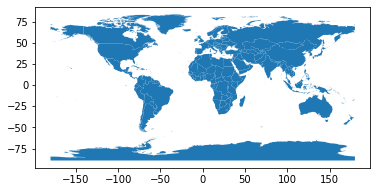

In [7]:
map_df.plot()

In [8]:
sorted_maps = map_df.sort_values(by='COUNTRY')
sorted_maps['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana',
       'Bouvet Island', 'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Canarias', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos Islands',
       'Colombia', 'Comoros', 'Congo', 'Congo DRC', 'Cook Islands',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuad

In [9]:
sorted_data = fert_df.sort_values(by='Area')
countries_data = sorted_data['Area'].unique()
countries_data

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia',
       'Australia', 'Australia and New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Caribbean',
       'Central African Republic', 'Central America', 'Central Asia',
       'Chile', 'China', 'China, Taiwan Province of', 'China, mainland',
       'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia', "C�te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic

In [10]:
missing_countries = map_df[~map_df['COUNTRY'].isin(countries_data)]
missing_countries['COUNTRY'].unique()

array(['American Samoa', 'United States Minor Outlying Islands', 'Niue',
       'Pitcairn', 'Tokelau', 'Wallis and Futuna', 'Falkland Islands',
       'Bolivia', 'South Georgia and South Sandwich Islands',
       'Antarctica', 'Saint Helena', 'Anguilla', 'Aruba', 'Bonaire',
       'British Virgin Islands', 'Cayman Islands', 'Curacao',
       'French Guiana', 'Grenada', 'Guadeloupe', 'Haiti', 'Martinique',
       'Montserrat', 'Puerto Rico', 'Saba', 'Saint Barthelemy',
       'Saint Eustatius', 'Saint Martin', 'Saint Pierre and Miquelon',
       'Saint Vincent and the Grenadines', 'Sint Maarten',
       'Turks and Caicos Islands', 'US Virgin Islands', 'Venezuela',
       'Cabo Verde', "Côte d'Ivoire", 'Gibraltar', 'Guinea-Bissau',
       'Liberia', 'Mauritania', 'Sierra Leone', 'Greenland', 'Guernsey',
       'Isle of Man', 'Jersey', 'United Kingdom', 'Faroe Islands',
       'Svalbard', 'Bouvet Island', 'Comoros', 'Congo DRC', 'Lesotho',
       'Juan De Nova Island', 'Sao Tome and Princ

In [11]:
map_df['COUNTRY'].isin(fert_df['Area']).value_counts()

True     153
False     96
Name: COUNTRY, dtype: int64

In [12]:
fert_df['Area'] = fert_df['Area'].str.replace('United States of America', 'United States')
fert_df['Area'] = fert_df['Area'].str.replace('USSR', 'Russian Federation')
fert_df['Area'] = fert_df['Area'].str.replace('Republic of Korea', 'South Korea')
fert_df['Area'] = fert_df['Area'].str.replace("Democratic People's South Korea", 'South Korea')
fert_df['Area'] = fert_df['Area'].str.replace("Democratic People's Republic of Korea", 'North Korea')
fert_df['Area'] = fert_df['Area'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
fert_df['Area'] = fert_df['Area'].str.replace("C�te d'Ivoire", "Côte d'Ivoire")
fert_df['Area'] = fert_df['Area'].str.replace('R�union', 'Réunion')
fert_df['Area'] = fert_df['Area'].str.replace('Syrian Arab Republic', 'Syria')
fert_df['Area'] = fert_df['Area'].str.replace('United Republic of Tanzania', 'Tanzania')
fert_df['Area'] = fert_df['Area'].str.replace('Ethiopia PDR', 'Ethiopia')
fert_df['Area'] = fert_df['Area'].str.replace('Viet Nam', 'Vietnam')
fert_df['Area'] = fert_df['Area'].str.replace('Sudan (former)', 'South Sudan')
fert_df['Area'] = fert_df['Area'].str.replace('Democratic Republic of the Congo', 'Congo DRC')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [13]:
# List country classifications that are not relevent
country_groups = ['Asia', 'Africa', 'Americas', 'Australia and New Zealand', 'Central America', 'Eastern Africa', 
    'Eastern Asia','Eastern Europe', 'European Union', 'Least Developed Countries', 
    'Land Locked Developing Countries', 'Low Income Food Deficit Countries',
    'Middle Africa', 'Net Food Importing Developing Countries', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Small Island Developing States',
    'South America', 'South', 'Southern Africa', 'Southern Asia', 'Southern Europe',
    'Western Africa', 'Western Asia', 'Western Europe']
    

In [14]:
# Loop through fert_df to remove unnessasary classifications
for country in country_groups:
    fert_df = fert_df[fert_df.Area != country]

In [15]:
# Remove country, classifications
# Create selection criteria 1
form_one = r',.*$'

In [16]:
# Remove country () classifications
# Create selection criteria 2
form_two = r'\s\(.+?\)'

In [17]:
# Remove country- classifications
# Create selection criteria 3
form_three = r'\-.*$'

In [18]:
# Create list of former USSR countries and create rows to add to dataframe
USSR_Countries = ['Turkmenistan', 'Uzbekistan', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Armenia', 'Georgia', 'Kazakhstan', 'Moldova', 'Kyrgyzstan', 'Tajikistan']
Ussr_df = fert_df.loc[(fert_df['Area'] == 'Russian Federation') & (fert_df['Year'] <= 1991)]
Ussr_df = Ussr_df.loc[Ussr_df.index.repeat(len(USSR_Countries))].reset_index(drop=True)
Ussr_df

Area Code  Area Code (M49)                Area  Item Code  \
0           228              810  Russian Federation       3102   
1           228              810  Russian Federation       3102   
2           228              810  Russian Federation       3102   
3           228              810  Russian Federation       3102   
4           228              810  Russian Federation       3102   
...         ...              ...                 ...        ...   
4116        228              810  Russian Federation       3104   
4117        228              810  Russian Federation       3104   
4118        228              810  Russian Federation       3104   
4119        228              810  Russian Federation       3104   
4120        228              810  Russian Federation       3104   

                             Item  Element Code           Element  Year Code  \
0     Nutrient nitrogen N (total)          5510        Production       1961   
1     Nutrient nitrogen N (total)          5510        Production       1961   
2     Nutrient nitrogen N (total)          5510        Production       1961   
3     Nutrient nitrogen N (total)          5510        Production       1961   
4     Nutrient nitrogen N (total)          5510        Production       1961   
...                           ...           ...               ...        ...   
4116  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4117  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4118  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4119  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4120  Nutrient potash K2O (total)          5157  Agricultural Use       1991   

      Year    Unit      Value Flag  
0     1961  tonnes  1168000.0   Qm  
1     1961  tonnes  1168000.0   Qm  
2     1961  tonnes  1168000.0   Qm  
3     1961  tonnes  1168000.0   Qm  
4     1961  tonnes  1168000.0   Qm  
...    ...     ...        ...  ...  
4116  1991  tonnes  5091000.0    X  
4117  1991  tonnes  5091000.0    X  
4118  1991  tonnes  5091000.0    X  
4119  1991  tonnes  5091000.0    X  
4120  1991  tonnes  5091000.0    X  

[4121 rows x 12 columns]

In [19]:
# Create data for USSR countries prior to 1992 using USSR data
x = 0
length = len(USSR_Countries)
for i, row in Ussr_df.iterrows():
    new_country = USSR_Countries[x]
    Ussr_df.loc[Ussr_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
Ussr_df   

Area Code  Area Code (M49)          Area  Item Code  \
0           228              810  Turkmenistan       3102   
1           228              810    Uzbekistan       3102   
2           228              810       Belarus       3102   
3           228              810       Estonia       3102   
4           228              810        Latvia       3102   
...         ...              ...           ...        ...   
4116        228              810       Georgia       3104   
4117        228              810    Kazakhstan       3104   
4118        228              810       Moldova       3104   
4119        228              810    Kyrgyzstan       3104   
4120        228              810    Tajikistan       3104   

                             Item  Element Code           Element  Year Code  \
0     Nutrient nitrogen N (total)          5510        Production       1961   
1     Nutrient nitrogen N (total)          5510        Production       1961   
2     Nutrient nitrogen N (total)          5510        Production       1961   
3     Nutrient nitrogen N (total)          5510        Production       1961   
4     Nutrient nitrogen N (total)          5510        Production       1961   
...                           ...           ...               ...        ...   
4116  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4117  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4118  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4119  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
4120  Nutrient potash K2O (total)          5157  Agricultural Use       1991   

      Year    Unit      Value Flag  
0     1961  tonnes  1168000.0   Qm  
1     1961  tonnes  1168000.0   Qm  
2     1961  tonnes  1168000.0   Qm  
3     1961  tonnes  1168000.0   Qm  
4     1961  tonnes  1168000.0   Qm  
...    ...     ...        ...  ...  
4116  1991  tonnes  5091000.0    X  
4117  1991  tonnes  5091000.0    X  
4118  1991  tonnes  5091000.0    X  
4119  1991  tonnes  5091000.0    X  
4120  1991  tonnes  5091000.0    X  

[4121 rows x 12 columns]

In [20]:
# Add USSR country data to fert production dataframe
update_fert_df = pd.concat([fert_df, Ussr_df], ignore_index=True)
update_fert_df

Area Code  Area Code (M49)         Area  Item Code  \
0              2                4  Afghanistan       3102   
1              2                4  Afghanistan       3102   
2              2                4  Afghanistan       3102   
3              2                4  Afghanistan       3102   
4              2                4  Afghanistan       3102   
...          ...              ...          ...        ...   
88101        228              810      Georgia       3104   
88102        228              810   Kazakhstan       3104   
88103        228              810      Moldova       3104   
88104        228              810   Kyrgyzstan       3104   
88105        228              810   Tajikistan       3104   

                              Item  Element Code           Element  Year Code  \
0      Nutrient nitrogen N (total)          5510        Production       1974   
1      Nutrient nitrogen N (total)          5510        Production       1975   
2      Nutrient nitrogen N (total)          5510        Production       1976   
3      Nutrient nitrogen N (total)          5510        Production       1977   
4      Nutrient nitrogen N (total)          5510        Production       1978   
...                            ...           ...               ...        ...   
88101  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
88102  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
88103  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
88104  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
88105  Nutrient potash K2O (total)          5157  Agricultural Use       1991   

       Year    Unit      Value Flag  
0      1974  tonnes    19117.0   Qm  
1      1975  tonnes    14774.0   Qm  
2      1976  tonnes    26203.0   Qm  
3      1977  tonnes    37689.0   Qm  
4      1978  tonnes    48300.0   Qm  
...     ...     ...        ...  ...  
88101  1991  tonnes  5091000.0    X  
88102  1991  tonnes  5091000.0    X  
88103  1991  tonnes  5091000.0    X  
88104  1991  tonnes  5091000.0    X  
88105  1991  tonnes  5091000.0    X  

[88106 rows x 12 columns]

In [21]:
# Create list of former Yugoslav countries and create rows to add to dataframe
Yugoslav_Countries = ['Slovania', 'Croatia', 'Bosnia', 'Montenegro', 'North Macedonia', 'Serbia']
yugo_df = update_fert_df.loc[(update_fert_df['Area'] == 'Yugoslav SFR') & (fert_df['Year'] <= 1991)]
yugo_df = yugo_df.loc[yugo_df.index.repeat(len(Yugoslav_Countries))].reset_index(drop=True)
yugo_df

Area Code  Area Code (M49)          Area  Item Code  \
0           248              890  Yugoslav SFR       3102   
1           248              890  Yugoslav SFR       3102   
2           248              890  Yugoslav SFR       3102   
3           248              890  Yugoslav SFR       3102   
4           248              890  Yugoslav SFR       3102   
...         ...              ...           ...        ...   
1909        248              890  Yugoslav SFR       3104   
1910        248              890  Yugoslav SFR       3104   
1911        248              890  Yugoslav SFR       3104   
1912        248              890  Yugoslav SFR       3104   
1913        248              890  Yugoslav SFR       3104   

                             Item  Element Code           Element  Year Code  \
0     Nutrient nitrogen N (total)          5510        Production       1961   
1     Nutrient nitrogen N (total)          5510        Production       1961   
2     Nutrient nitrogen N (total)          5510        Production       1961   
3     Nutrient nitrogen N (total)          5510        Production       1961   
4     Nutrient nitrogen N (total)          5510        Production       1961   
...                           ...           ...               ...        ...   
1909  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1910  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1911  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1912  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1913  Nutrient potash K2O (total)          5157  Agricultural Use       1991   

      Year    Unit     Value Flag  
0     1961  tonnes   12960.0   Qm  
1     1961  tonnes   12960.0   Qm  
2     1961  tonnes   12960.0   Qm  
3     1961  tonnes   12960.0   Qm  
4     1961  tonnes   12960.0   Qm  
...    ...     ...       ...  ...  
1909  1991  tonnes  154300.0    X  
1910  1991  tonnes  154300.0    X  
1911  1991  tonnes  154300.0    X  
1912  1991  tonnes  154300.0    X  
1913  1991  tonnes  154300.0    X  

[1914 rows x 12 columns]

In [22]:
# Create data for Yugoslavic countries prior to 1992 using Yugoslav data
x = 0
length = len(Yugoslav_Countries)
for i, row in yugo_df.iterrows():
    new_country = Yugoslav_Countries[x]
    yugo_df.loc[yugo_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
yugo_df   

Area Code  Area Code (M49)             Area  Item Code  \
0           248              890         Slovania       3102   
1           248              890          Croatia       3102   
2           248              890           Bosnia       3102   
3           248              890       Montenegro       3102   
4           248              890  North Macedonia       3102   
...         ...              ...              ...        ...   
1909        248              890          Croatia       3104   
1910        248              890           Bosnia       3104   
1911        248              890       Montenegro       3104   
1912        248              890  North Macedonia       3104   
1913        248              890           Serbia       3104   

                             Item  Element Code           Element  Year Code  \
0     Nutrient nitrogen N (total)          5510        Production       1961   
1     Nutrient nitrogen N (total)          5510        Production       1961   
2     Nutrient nitrogen N (total)          5510        Production       1961   
3     Nutrient nitrogen N (total)          5510        Production       1961   
4     Nutrient nitrogen N (total)          5510        Production       1961   
...                           ...           ...               ...        ...   
1909  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1910  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1911  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1912  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
1913  Nutrient potash K2O (total)          5157  Agricultural Use       1991   

      Year    Unit     Value Flag  
0     1961  tonnes   12960.0   Qm  
1     1961  tonnes   12960.0   Qm  
2     1961  tonnes   12960.0   Qm  
3     1961  tonnes   12960.0   Qm  
4     1961  tonnes   12960.0   Qm  
...    ...     ...       ...  ...  
1909  1991  tonnes  154300.0    X  
1910  1991  tonnes  154300.0    X  
1911  1991  tonnes  154300.0    X  
1912  1991  tonnes  154300.0    X  
1913  1991  tonnes  154300.0    X  

[1914 rows x 12 columns]

In [23]:
# Add Yugoslav country data to fert production dataframe
new_fert_df = pd.concat([update_fert_df, yugo_df], ignore_index=True)
new_fert_df

Area Code  Area Code (M49)             Area  Item Code  \
0              2                4      Afghanistan       3102   
1              2                4      Afghanistan       3102   
2              2                4      Afghanistan       3102   
3              2                4      Afghanistan       3102   
4              2                4      Afghanistan       3102   
...          ...              ...              ...        ...   
90015        248              890          Croatia       3104   
90016        248              890           Bosnia       3104   
90017        248              890       Montenegro       3104   
90018        248              890  North Macedonia       3104   
90019        248              890           Serbia       3104   

                              Item  Element Code           Element  Year Code  \
0      Nutrient nitrogen N (total)          5510        Production       1974   
1      Nutrient nitrogen N (total)          5510        Production       1975   
2      Nutrient nitrogen N (total)          5510        Production       1976   
3      Nutrient nitrogen N (total)          5510        Production       1977   
4      Nutrient nitrogen N (total)          5510        Production       1978   
...                            ...           ...               ...        ...   
90015  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
90016  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
90017  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
90018  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
90019  Nutrient potash K2O (total)          5157  Agricultural Use       1991   

       Year    Unit     Value Flag  
0      1974  tonnes   19117.0   Qm  
1      1975  tonnes   14774.0   Qm  
2      1976  tonnes   26203.0   Qm  
3      1977  tonnes   37689.0   Qm  
4      1978  tonnes   48300.0   Qm  
...     ...     ...       ...  ...  
90015  1991  tonnes  154300.0    X  
90016  1991  tonnes  154300.0    X  
90017  1991  tonnes  154300.0    X  
90018  1991  tonnes  154300.0    X  
90019  1991  tonnes  154300.0    X  

[90020 rows x 12 columns]

In [24]:
# Create list of former Czechoslovakia countries and create rows to add to dataframe
Czech_Countries = ['Czeckia', 'Slovakia']
czech_df = fert_df.loc[(fert_df['Area'] == 'Czechoslovakia') & (fert_df['Year'] <= 1992)]
czech_df = czech_df.loc[czech_df.index.repeat(len(Czech_Countries))].reset_index(drop=True)
czech_df

Area Code  Area Code (M49)            Area  Item Code  \
0           51              200  Czechoslovakia       3102   
1           51              200  Czechoslovakia       3102   
2           51              200  Czechoslovakia       3102   
3           51              200  Czechoslovakia       3102   
4           51              200  Czechoslovakia       3102   
..         ...              ...             ...        ...   
587         51              200  Czechoslovakia       3104   
588         51              200  Czechoslovakia       3104   
589         51              200  Czechoslovakia       3104   
590         51              200  Czechoslovakia       3104   
591         51              200  Czechoslovakia       3104   

                            Item  Element Code           Element  Year Code  \
0    Nutrient nitrogen N (total)          5510        Production       1961   
1    Nutrient nitrogen N (total)          5510        Production       1961   
2    Nutrient nitrogen N (total)          5510        Production       1962   
3    Nutrient nitrogen N (total)          5510        Production       1962   
4    Nutrient nitrogen N (total)          5510        Production       1963   
..                           ...           ...               ...        ...   
587  Nutrient potash K2O (total)          5157  Agricultural Use       1990   
588  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
589  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
590  Nutrient potash K2O (total)          5157  Agricultural Use       1992   
591  Nutrient potash K2O (total)          5157  Agricultural Use       1992   

     Year    Unit     Value Flag  
0    1961  tonnes  146200.0   Qm  
1    1961  tonnes  146200.0   Qm  
2    1962  tonnes  153916.0   Qm  
3    1962  tonnes  153916.0   Qm  
4    1963  tonnes  153811.0   Qm  
..    ...     ...       ...  ...  
587  1990  tonnes  355900.0    X  
588  1991  tonnes   61600.0    X  
589  1991  tonnes   61600.0    X  
590  1992  tonnes   35100.0    X  
591  1992  tonnes   35100.0    X  

[592 rows x 12 columns]

In [25]:
# Create data for Czechoslovakian countries prior to 1993 using Czechoslovakia data
x = 0
length = len(Czech_Countries)
for i, row in czech_df.iterrows():
    new_country = Czech_Countries[x]
    czech_df.loc[czech_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
czech_df

Area Code  Area Code (M49)      Area  Item Code  \
0           51              200   Czeckia       3102   
1           51              200  Slovakia       3102   
2           51              200   Czeckia       3102   
3           51              200  Slovakia       3102   
4           51              200   Czeckia       3102   
..         ...              ...       ...        ...   
587         51              200  Slovakia       3104   
588         51              200   Czeckia       3104   
589         51              200  Slovakia       3104   
590         51              200   Czeckia       3104   
591         51              200  Slovakia       3104   

                            Item  Element Code           Element  Year Code  \
0    Nutrient nitrogen N (total)          5510        Production       1961   
1    Nutrient nitrogen N (total)          5510        Production       1961   
2    Nutrient nitrogen N (total)          5510        Production       1962   
3    Nutrient nitrogen N (total)          5510        Production       1962   
4    Nutrient nitrogen N (total)          5510        Production       1963   
..                           ...           ...               ...        ...   
587  Nutrient potash K2O (total)          5157  Agricultural Use       1990   
588  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
589  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
590  Nutrient potash K2O (total)          5157  Agricultural Use       1992   
591  Nutrient potash K2O (total)          5157  Agricultural Use       1992   

     Year    Unit     Value Flag  
0    1961  tonnes  146200.0   Qm  
1    1961  tonnes  146200.0   Qm  
2    1962  tonnes  153916.0   Qm  
3    1962  tonnes  153916.0   Qm  
4    1963  tonnes  153811.0   Qm  
..    ...     ...       ...  ...  
587  1990  tonnes  355900.0    X  
588  1991  tonnes   61600.0    X  
589  1991  tonnes   61600.0    X  
590  1992  tonnes   35100.0    X  
591  1992  tonnes   35100.0    X  

[592 rows x 12 columns]

In [26]:
# Add Czech country data to fert production dataframe
additional_fert_df = pd.concat([new_fert_df, czech_df], ignore_index=True)
additional_fert_df

Area Code  Area Code (M49)         Area  Item Code  \
0              2                4  Afghanistan       3102   
1              2                4  Afghanistan       3102   
2              2                4  Afghanistan       3102   
3              2                4  Afghanistan       3102   
4              2                4  Afghanistan       3102   
...          ...              ...          ...        ...   
90607         51              200     Slovakia       3104   
90608         51              200      Czeckia       3104   
90609         51              200     Slovakia       3104   
90610         51              200      Czeckia       3104   
90611         51              200     Slovakia       3104   

                              Item  Element Code           Element  Year Code  \
0      Nutrient nitrogen N (total)          5510        Production       1974   
1      Nutrient nitrogen N (total)          5510        Production       1975   
2      Nutrient nitrogen N (total)          5510        Production       1976   
3      Nutrient nitrogen N (total)          5510        Production       1977   
4      Nutrient nitrogen N (total)          5510        Production       1978   
...                            ...           ...               ...        ...   
90607  Nutrient potash K2O (total)          5157  Agricultural Use       1990   
90608  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
90609  Nutrient potash K2O (total)          5157  Agricultural Use       1991   
90610  Nutrient potash K2O (total)          5157  Agricultural Use       1992   
90611  Nutrient potash K2O (total)          5157  Agricultural Use       1992   

       Year    Unit     Value Flag  
0      1974  tonnes   19117.0   Qm  
1      1975  tonnes   14774.0   Qm  
2      1976  tonnes   26203.0   Qm  
3      1977  tonnes   37689.0   Qm  
4      1978  tonnes   48300.0   Qm  
...     ...     ...       ...  ...  
90607  1990  tonnes  355900.0    X  
90608  1991  tonnes   61600.0    X  
90609  1991  tonnes   61600.0    X  
90610  1992  tonnes   35100.0    X  
90611  1992  tonnes   35100.0    X  

[90612 rows x 12 columns]

In [27]:
# Remove Czechoslovakia data
additional_fert_df = additional_fert_df[additional_fert_df.Area != 'Czechoslovakia']

In [28]:
# Create list to split Serbia and Montenegro countries and create rows to add to dataframe
Serb_Mont_Countries = ['Serbia', 'Montenegro']
SerbMont_df = fert_df.loc[(fert_df['Area'] == 'Serbia and Montenegro') & (fert_df['Year'] <= 2005)]
SerbMont_df = SerbMont_df.loc[SerbMont_df.index.repeat(len(Serb_Mont_Countries))].reset_index(drop=True)
SerbMont_df

Area Code  Area Code (M49)                   Area  Item Code  \
0          186              891  Serbia and Montenegro       3102   
1          186              891  Serbia and Montenegro       3102   
2          186              891  Serbia and Montenegro       3102   
3          186              891  Serbia and Montenegro       3102   
4          186              891  Serbia and Montenegro       3102   
..         ...              ...                    ...        ...   
221        186              891  Serbia and Montenegro       3104   
222        186              891  Serbia and Montenegro       3104   
223        186              891  Serbia and Montenegro       3104   
224        186              891  Serbia and Montenegro       3104   
225        186              891  Serbia and Montenegro       3104   

                            Item  Element Code           Element  Year Code  \
0    Nutrient nitrogen N (total)          5510        Production       1992   
1    Nutrient nitrogen N (total)          5510        Production       1992   
2    Nutrient nitrogen N (total)          5510        Production       1993   
3    Nutrient nitrogen N (total)          5510        Production       1993   
4    Nutrient nitrogen N (total)          5510        Production       1994   
..                           ...           ...               ...        ...   
221  Nutrient potash K2O (total)          5157  Agricultural Use       2003   
222  Nutrient potash K2O (total)          5157  Agricultural Use       2004   
223  Nutrient potash K2O (total)          5157  Agricultural Use       2004   
224  Nutrient potash K2O (total)          5157  Agricultural Use       2005   
225  Nutrient potash K2O (total)          5157  Agricultural Use       2005   

     Year    Unit     Value Flag  
0    1992  tonnes   78000.0    E  
1    1992  tonnes   78000.0    E  
2    1993  tonnes   58800.0    X  
3    1993  tonnes   58800.0    X  
4    1994  tonnes   70000.0    X  
..    ...     ...       ...  ...  
221  2003  tonnes   85860.0   Fb  
222  2004  tonnes  112052.0   Fb  
223  2004  tonnes  112052.0   Fb  
224  2005  tonnes   91825.0   Fb  
225  2005  tonnes   91825.0   Fb  

[226 rows x 12 columns]

In [29]:
# Create data for Serbia and Montenegro countries prior to 1993 using Serbia/Montenegro data
x = 0
length = len(Serb_Mont_Countries)
for i, row in SerbMont_df.iterrows():
    new_country = Serb_Mont_Countries[x]
    SerbMont_df.loc[SerbMont_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
SerbMont_df

Area Code  Area Code (M49)        Area  Item Code  \
0          186              891      Serbia       3102   
1          186              891  Montenegro       3102   
2          186              891      Serbia       3102   
3          186              891  Montenegro       3102   
4          186              891      Serbia       3102   
..         ...              ...         ...        ...   
221        186              891  Montenegro       3104   
222        186              891      Serbia       3104   
223        186              891  Montenegro       3104   
224        186              891      Serbia       3104   
225        186              891  Montenegro       3104   

                            Item  Element Code           Element  Year Code  \
0    Nutrient nitrogen N (total)          5510        Production       1992   
1    Nutrient nitrogen N (total)          5510        Production       1992   
2    Nutrient nitrogen N (total)          5510        Production       1993   
3    Nutrient nitrogen N (total)          5510        Production       1993   
4    Nutrient nitrogen N (total)          5510        Production       1994   
..                           ...           ...               ...        ...   
221  Nutrient potash K2O (total)          5157  Agricultural Use       2003   
222  Nutrient potash K2O (total)          5157  Agricultural Use       2004   
223  Nutrient potash K2O (total)          5157  Agricultural Use       2004   
224  Nutrient potash K2O (total)          5157  Agricultural Use       2005   
225  Nutrient potash K2O (total)          5157  Agricultural Use       2005   

     Year    Unit     Value Flag  
0    1992  tonnes   78000.0    E  
1    1992  tonnes   78000.0    E  
2    1993  tonnes   58800.0    X  
3    1993  tonnes   58800.0    X  
4    1994  tonnes   70000.0    X  
..    ...     ...       ...  ...  
221  2003  tonnes   85860.0   Fb  
222  2004  tonnes  112052.0   Fb  
223  2004  tonnes  112052.0   Fb  
224  2005  tonnes   91825.0   Fb  
225  2005  tonnes   91825.0   Fb  

[226 rows x 12 columns]

In [30]:
# Add Serbia and Montenegro country data to fert production dataframe
final_fert_df = pd.concat([additional_fert_df, SerbMont_df], ignore_index=True)
final_fert_df

Area Code  Area Code (M49)         Area  Item Code  \
0              2                4  Afghanistan       3102   
1              2                4  Afghanistan       3102   
2              2                4  Afghanistan       3102   
3              2                4  Afghanistan       3102   
4              2                4  Afghanistan       3102   
...          ...              ...          ...        ...   
90537        186              891   Montenegro       3104   
90538        186              891       Serbia       3104   
90539        186              891   Montenegro       3104   
90540        186              891       Serbia       3104   
90541        186              891   Montenegro       3104   

                              Item  Element Code           Element  Year Code  \
0      Nutrient nitrogen N (total)          5510        Production       1974   
1      Nutrient nitrogen N (total)          5510        Production       1975   
2      Nutrient nitrogen N (total)          5510        Production       1976   
3      Nutrient nitrogen N (total)          5510        Production       1977   
4      Nutrient nitrogen N (total)          5510        Production       1978   
...                            ...           ...               ...        ...   
90537  Nutrient potash K2O (total)          5157  Agricultural Use       2003   
90538  Nutrient potash K2O (total)          5157  Agricultural Use       2004   
90539  Nutrient potash K2O (total)          5157  Agricultural Use       2004   
90540  Nutrient potash K2O (total)          5157  Agricultural Use       2005   
90541  Nutrient potash K2O (total)          5157  Agricultural Use       2005   

       Year    Unit     Value Flag  
0      1974  tonnes   19117.0   Qm  
1      1975  tonnes   14774.0   Qm  
2      1976  tonnes   26203.0   Qm  
3      1977  tonnes   37689.0   Qm  
4      1978  tonnes   48300.0   Qm  
...     ...     ...       ...  ...  
90537  2003  tonnes   85860.0   Fb  
90538  2004  tonnes  112052.0   Fb  
90539  2004  tonnes  112052.0   Fb  
90540  2005  tonnes   91825.0   Fb  
90541  2005  tonnes   91825.0   Fb  

[90542 rows x 12 columns]

In [31]:
# Remove Serbia and Montenegro data
final_fert_df = final_fert_df[final_fert_df.Area != 'Serbia and Montenegro']

In [32]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(final_fert_df.set_index("Area"))
merged.head()

FID ISO   COUNTRYAFF AFF_ISO  SHAPE_Leng  SHAPE_Area  \
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   

                                                      geometry  Area Code  \
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...        2.0   

             Area Code (M49)  Item Code                         Item  \
Afghanistan              4.0     3102.0  Nutrient nitrogen N (total)   
Afghanistan              4.0     3102.0  Nutrient nitrogen N (total)   
Afghanistan              4.0     3102.0  Nutrient nitrogen N (total)   
Afghanistan              4.0     3102.0  Nutrient nitrogen N (total)   
Afghanistan              4.0     3102.0  Nutrient nitrogen N (total)   

             Element Code     Element  Year Code    Year    Unit    Value Flag  
Afghanistan        5510.0  Production     1974.0  1974.0  tonnes  19117.0   Qm  
Afghanistan        5510.0  Production     1975.0  1975.0  tonnes  14774.0   Qm  
Afghanistan        5510.0  Production     1976.0  1976.0  tonnes  26203.0   Qm  
Afghanistan        5510.0  Production     1977.0  1977.0  tonnes  37689.0   Qm  
Afghanistan        5510.0  Production     1978.0  1978.0  tonnes  48300.0   Qm

In [33]:
# Get a list of years for data loops
from datetime import date

start = date(1961, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [34]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 2000000

In [35]:
world_data_df = final_fert_df.loc[(final_fert_df['Area'] == 'World') & (final_fert_df['Item Code'] == 3103) & (final_fert_df['Element Code'] == 5157)]
world_data_df['Mill_Tonnes'] = round(final_fert_df['Value']/1000000, 3)
world_data_df['Mill_Tonnes'] = world_data_df['Mill_Tonnes'].astype('string')
world_data_df
result = []
for value in world_data_df['Mill_Tonnes']:
    text = f"{value} Million Tonnes"
    result.append(text)
world_data_df['Mill_Tonnes_Text'] = result
world_data_df

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Area Code  Area Code (M49)   Area  Item Code  \
78691       5000                1  World       3103   
78692       5000                1  World       3103   
78693       5000                1  World       3103   
78694       5000                1  World       3103   
78695       5000                1  World       3103   
78696       5000                1  World       3103   
78697       5000                1  World       3103   
78698       5000                1  World       3103   
78699       5000                1  World       3103   
78700       5000                1  World       3103   
78701       5000                1  World       3103   
78702       5000                1  World       3103   
78703       5000                1  World       3103   
78704       5000                1  World       3103   
78705       5000                1  World       3103   
78706       5000                1  World       3103   
78707       5000                1  World       3103   
78708       5000                1  World       3103   
78709       5000                1  World       3103   
78710       5000                1  World       3103   
78711       5000                1  World       3103   
78712       5000                1  World       3103   
78713       5000                1  World       3103   
78714       5000                1  World       3103   
78715       5000                1  World       3103   
78716       5000                1  World       3103   
78717       5000                1  World       3103   
78718       5000                1  World       3103   
78719       5000                1  World       3103   
78720       5000                1  World       3103   
78721       5000                1  World       3103   
78722       5000                1  World       3103   
78723       5000                1  World       3103   
78724       5000                1  World       3103   
78725       5000                1  World       3103   
78726       5000                1  World       3103   
78727       5000                1  World       3103   
78728       5000                1  World       3103   
78729       5000                1  World       3103   
78730       5000                1  World       3103   
78731       5000                1  World       3103   
78732       5000                1  World       3103   
78733       5000                1  World       3103   
78734       5000                1  World       3103   
78735       5000                1  World       3103   
78736       5000                1  World       3103   
78737       5000                1  World       3103   
78738       5000                1  World       3103   
78739       5000                1  World       3103   
78740       5000                1  World       3103   
78741       5000                1  World       3103   
78742       5000                1  World       3103   
78743       5000                1  World       3103   
78744       5000                1  World       3103   
78745       5000                1  World       3103   
78746       5000                1  World       3103   
78747       5000                1  World       3103   
78748       5000                1  World       3103   
78749       5000                1  World       3103   
78750       5000                1  World       3103   

                                  Item  Element Code           Element  \
78691  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78692  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78693  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78694  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78695  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78696  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78697  Nutrient phosphate P2O5 (total)          5157  Agricultural Use   
78698  Nutrient phosphate P2O5 (total)          5157  Agric

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


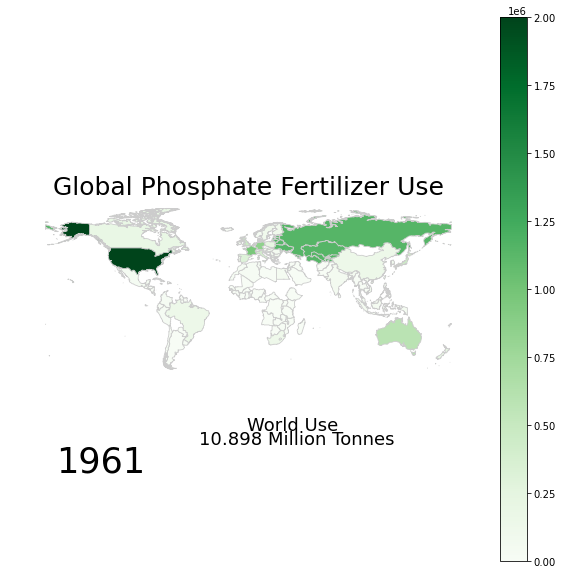

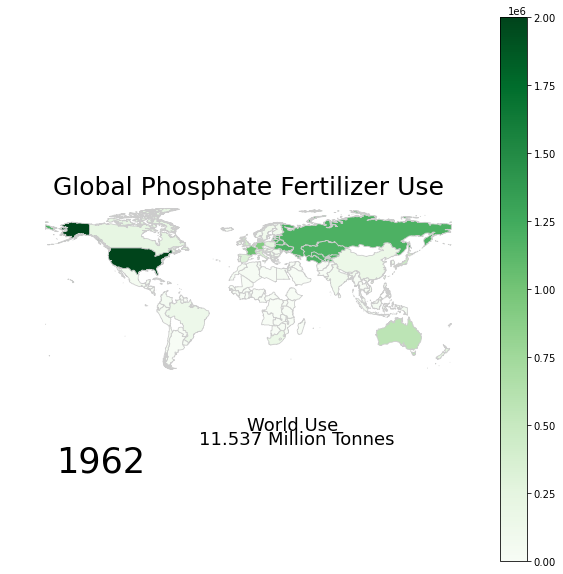

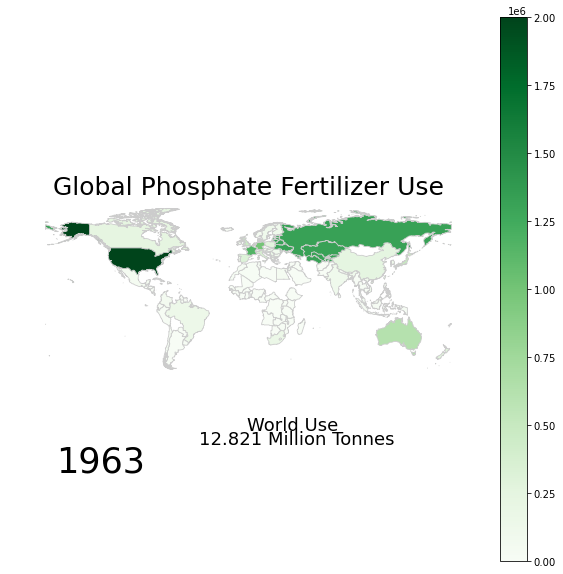

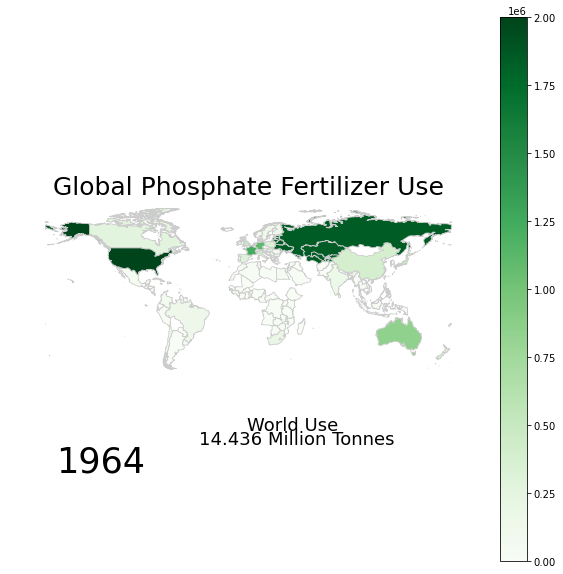

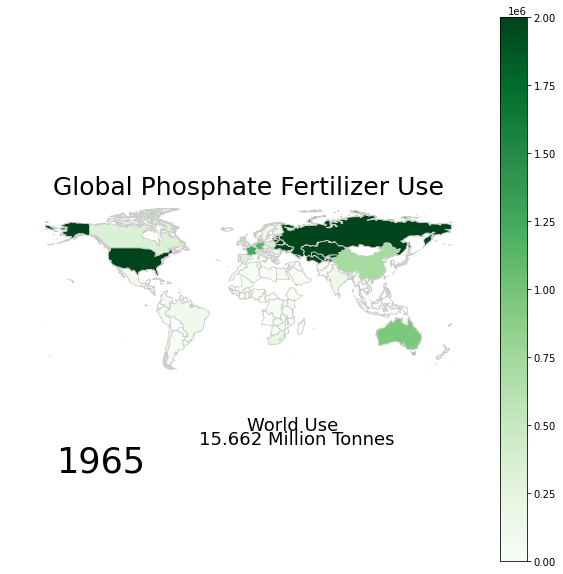

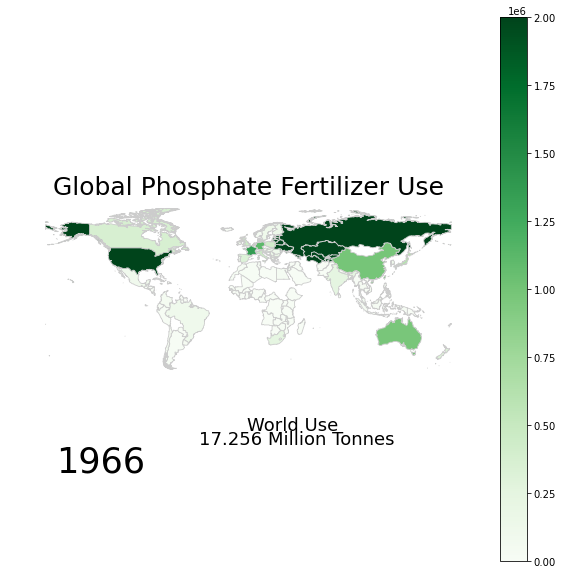

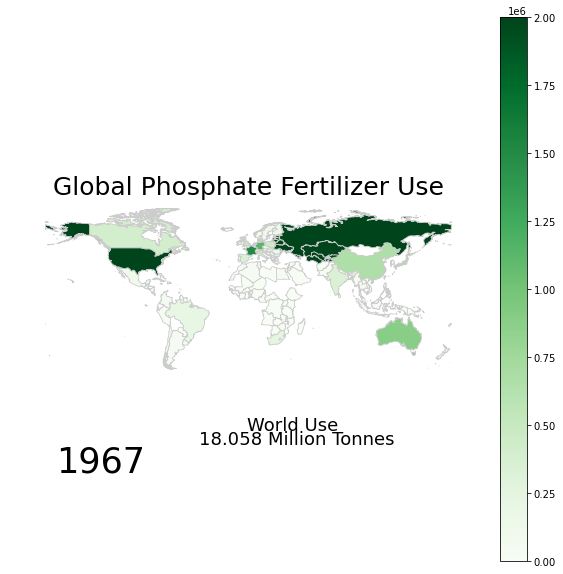

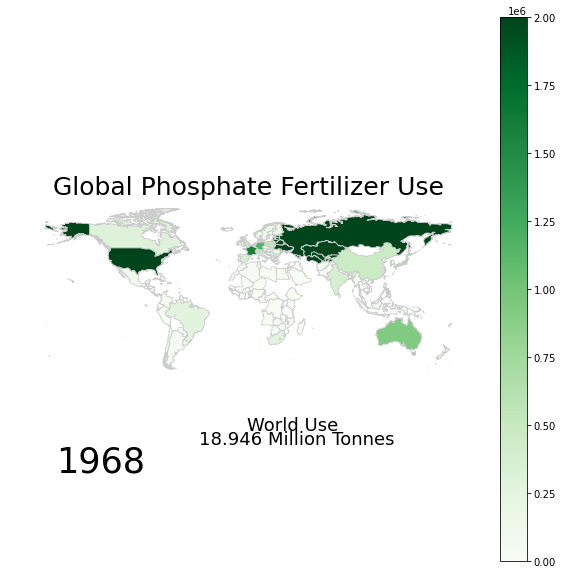

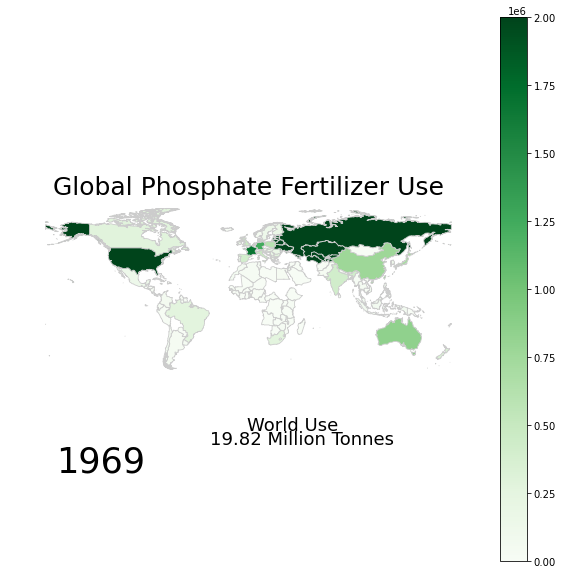

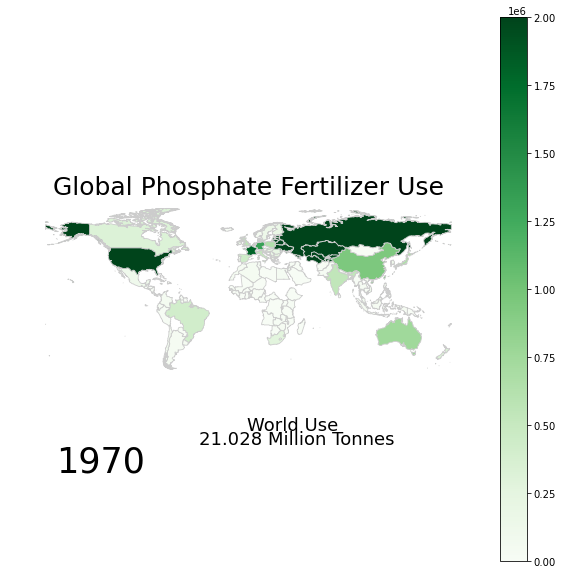

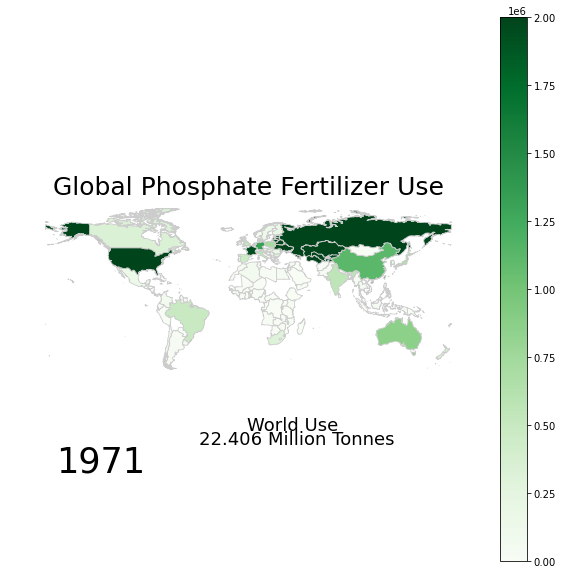

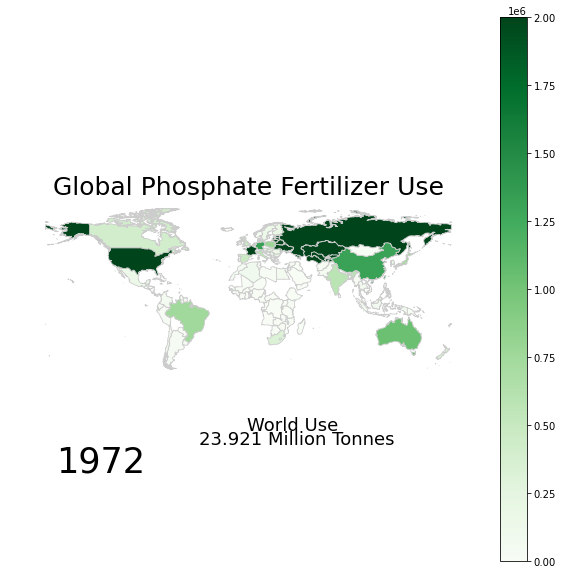

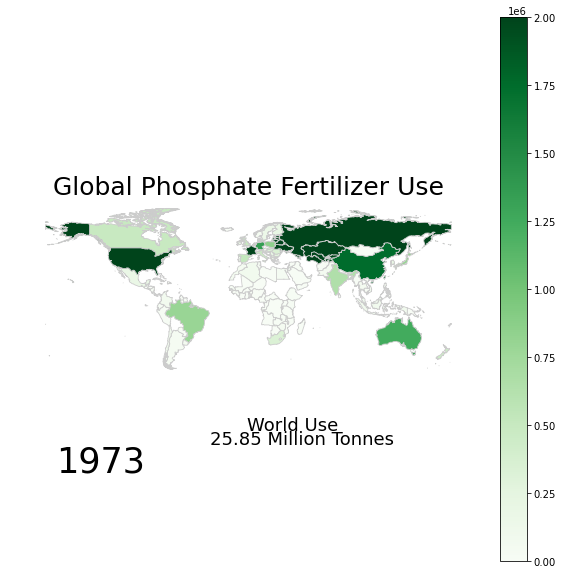

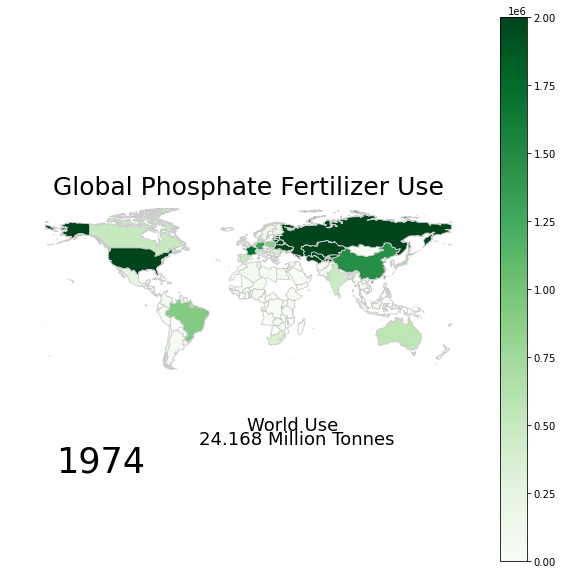

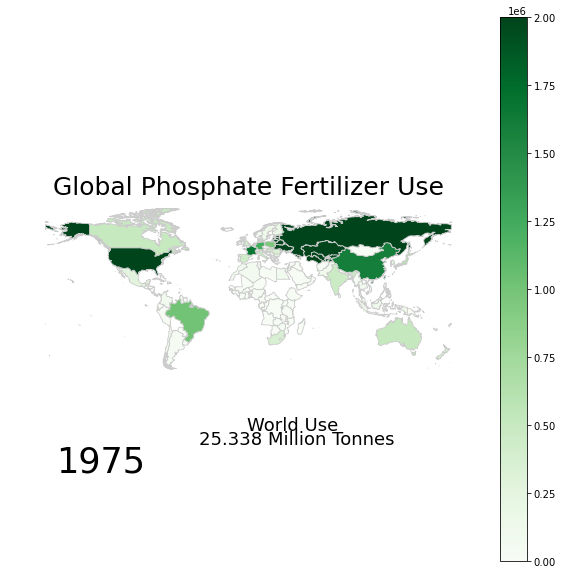

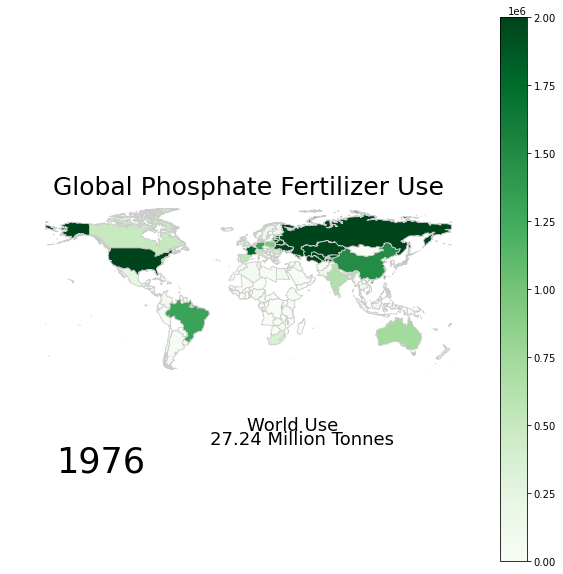

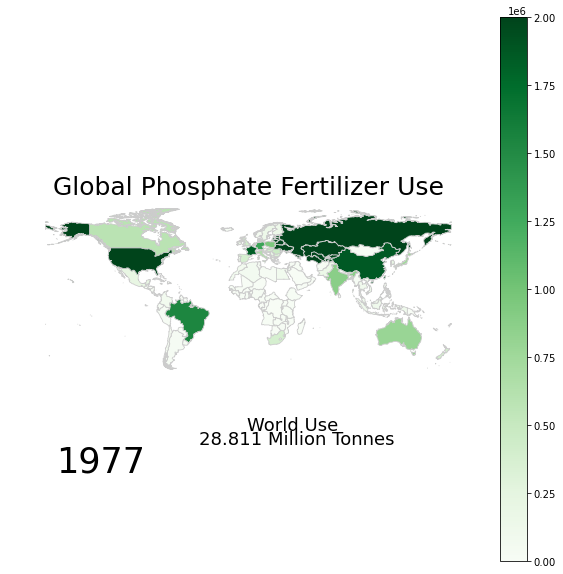

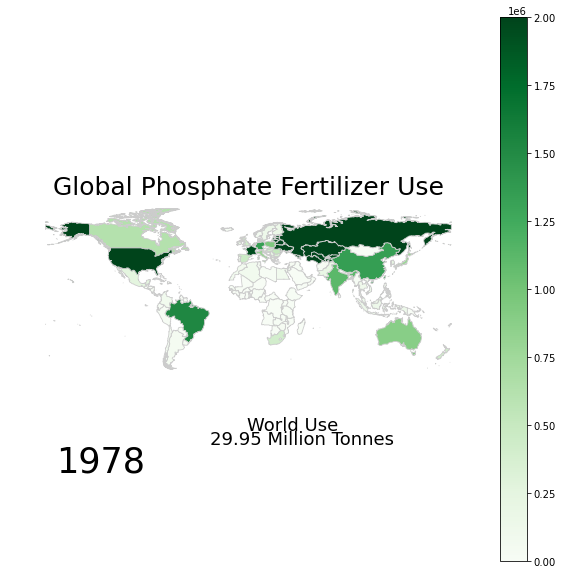

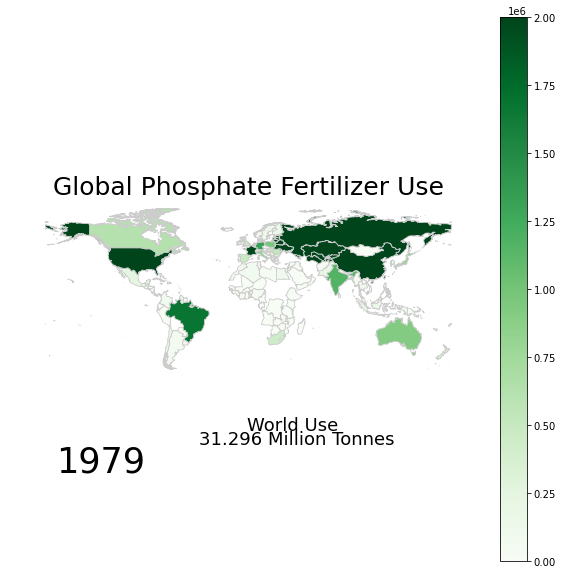

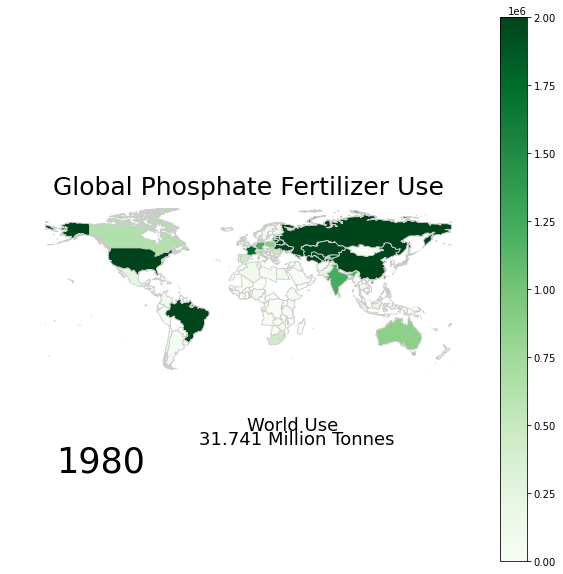

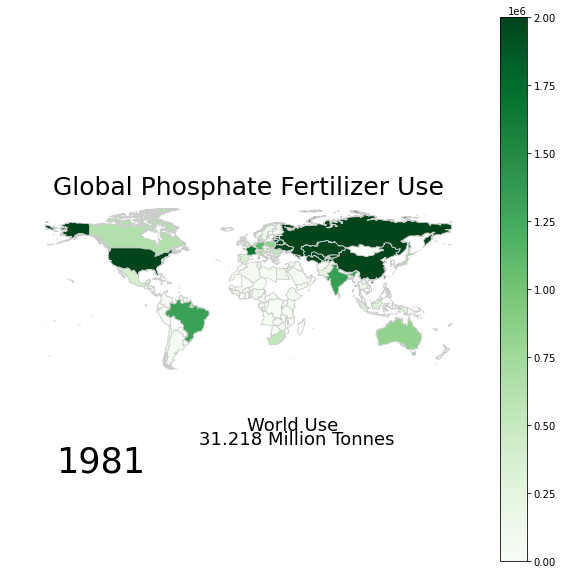

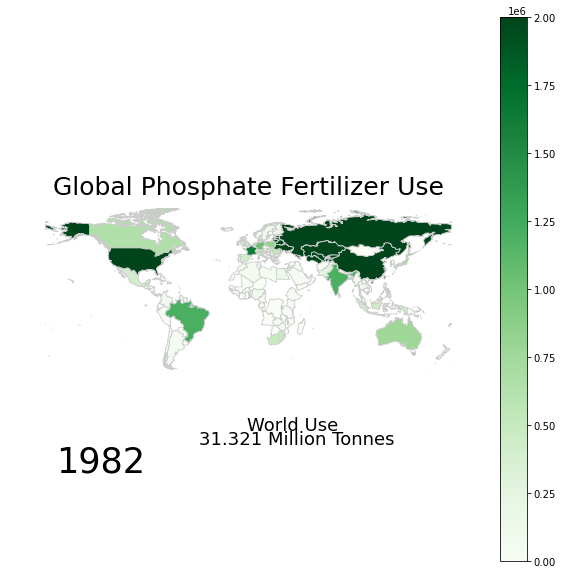

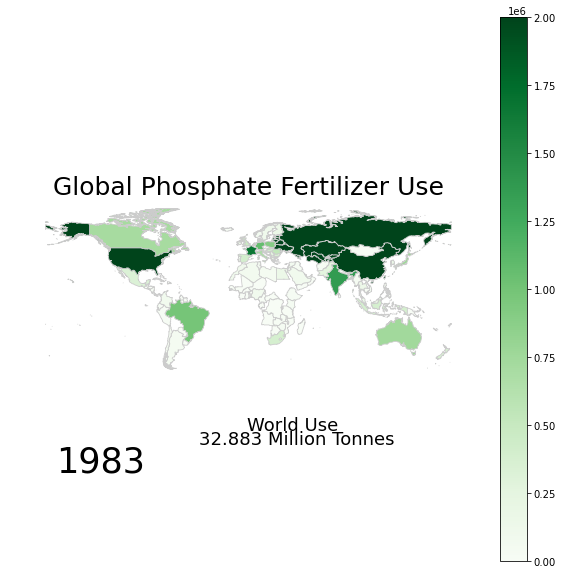

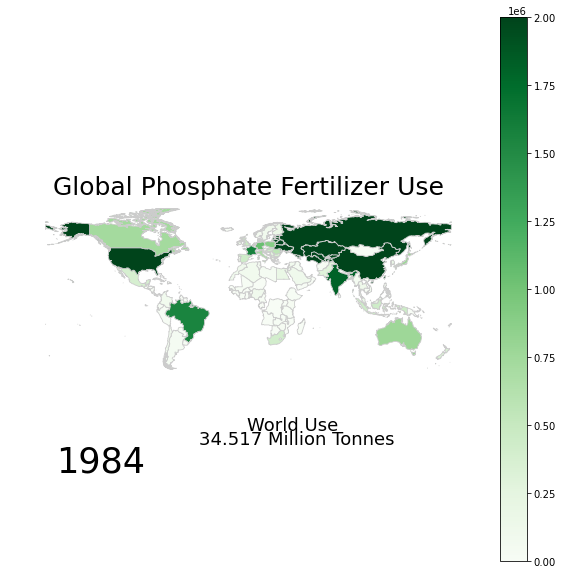

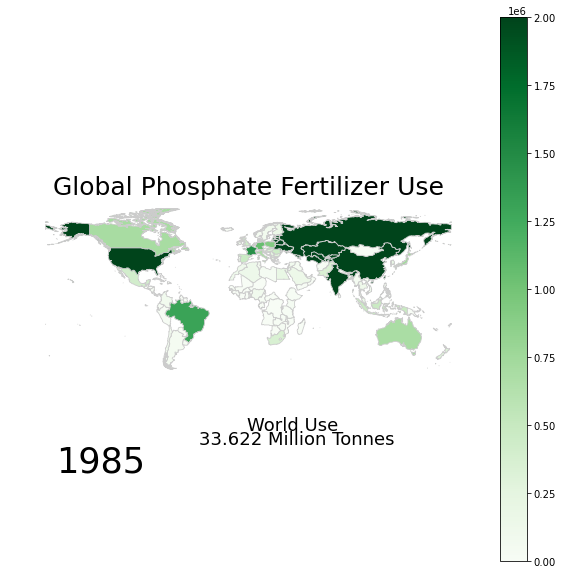

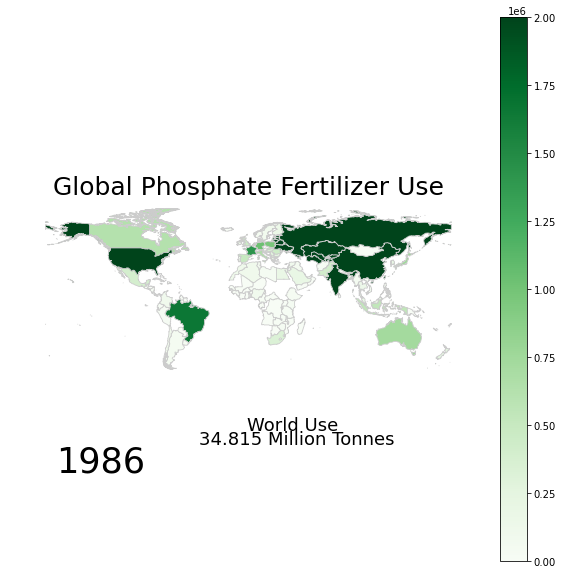

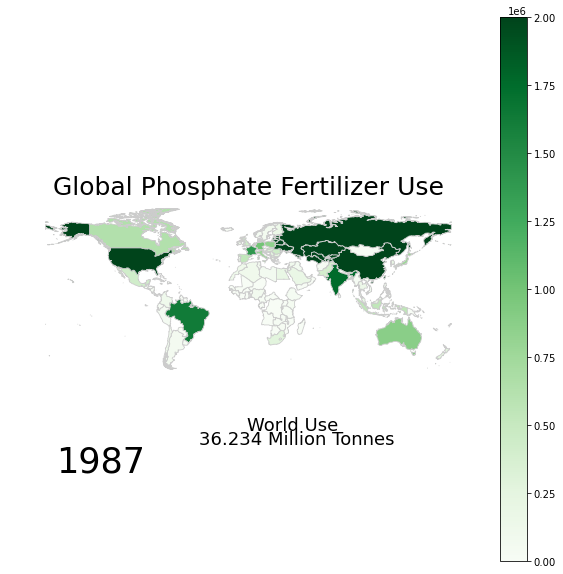

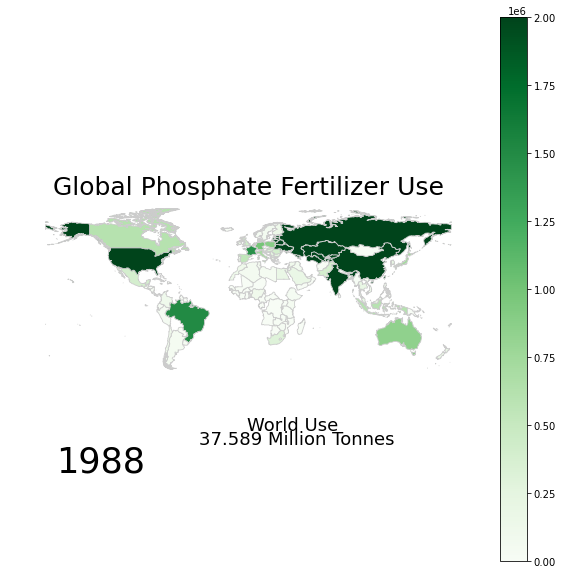

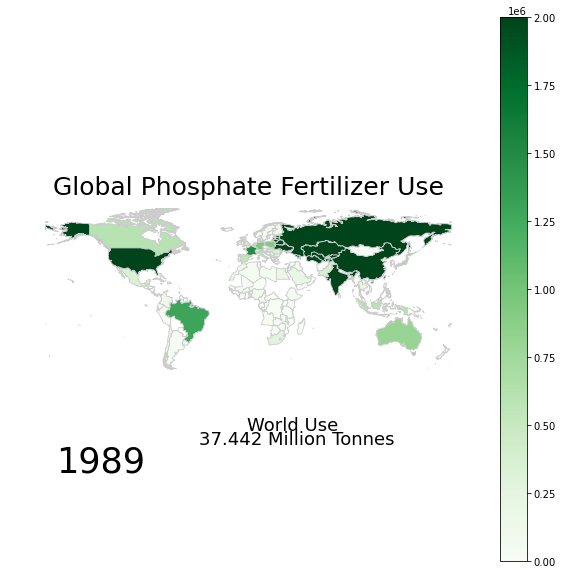

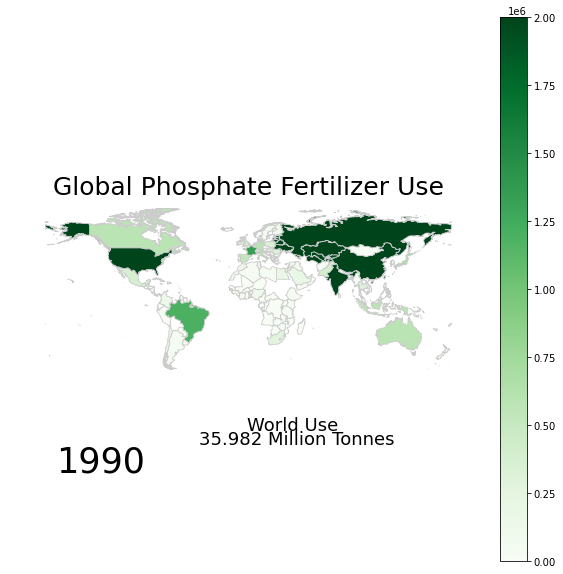

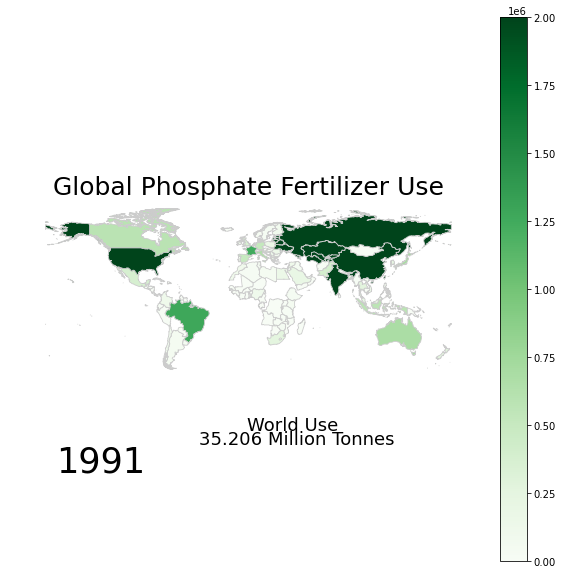

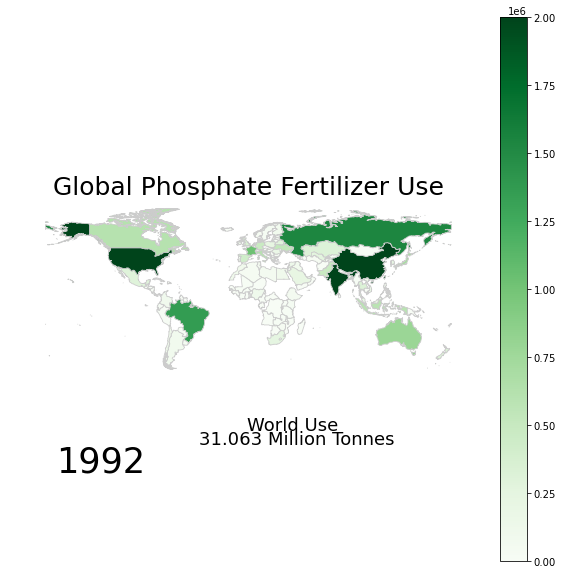

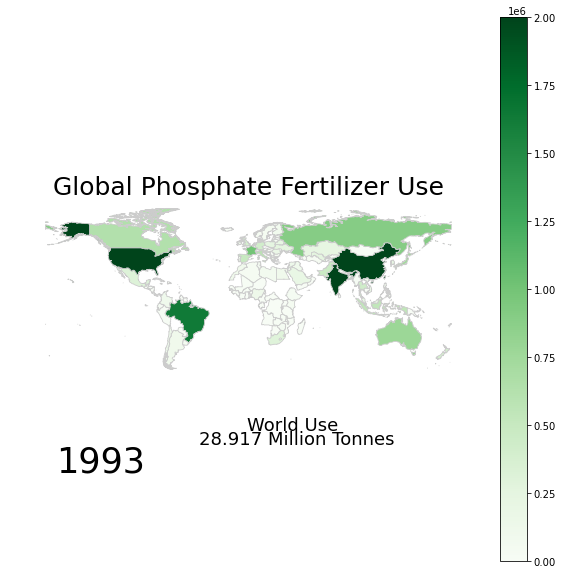

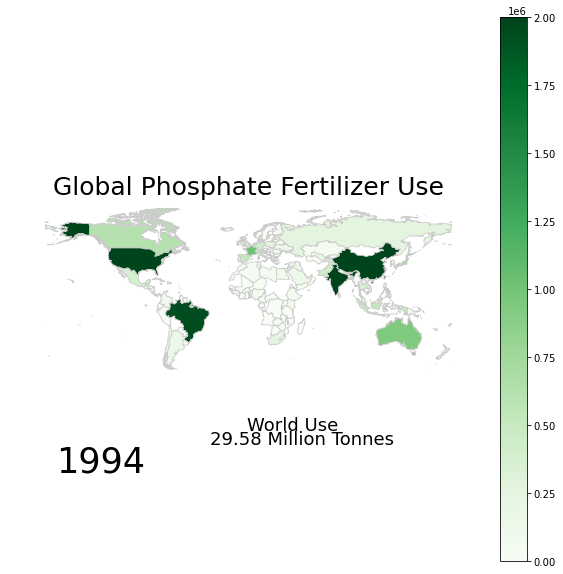

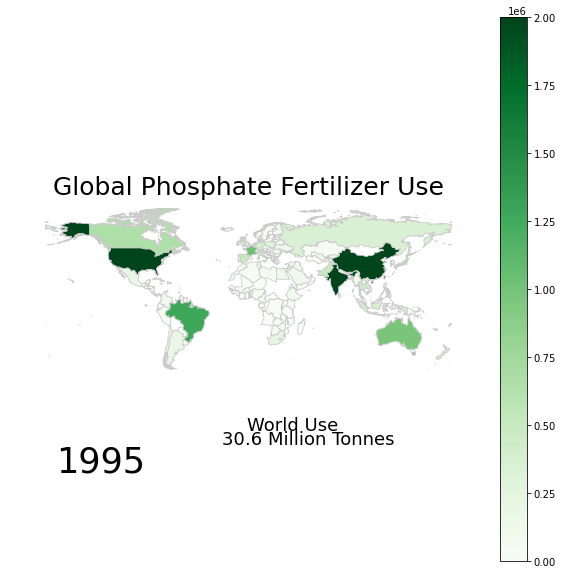

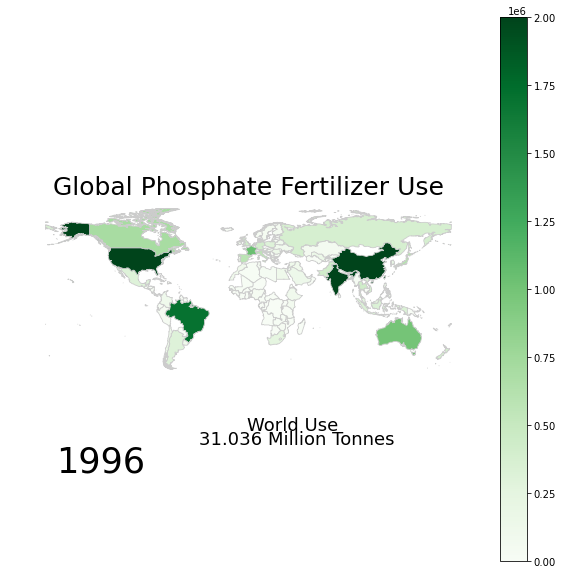

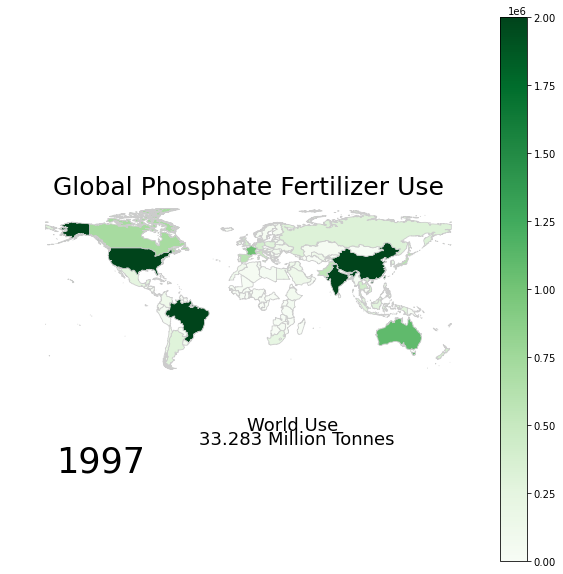

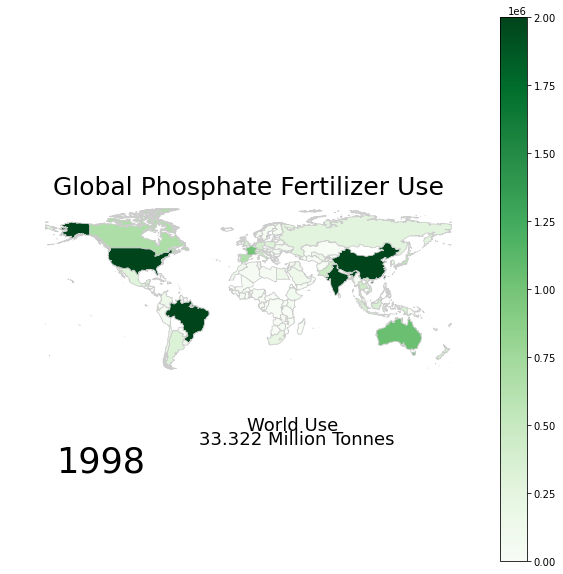

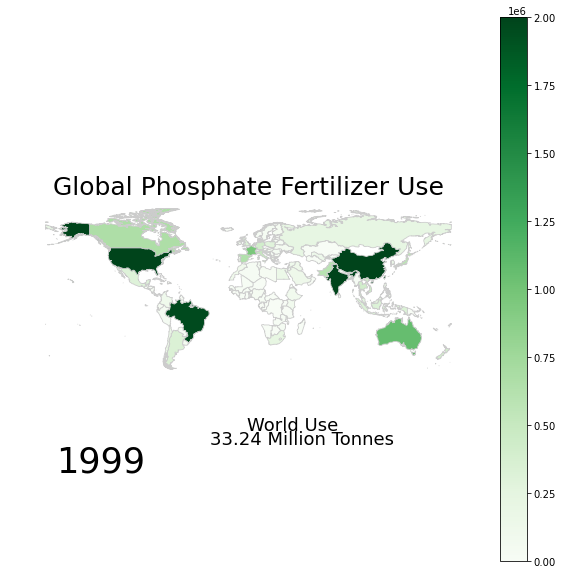

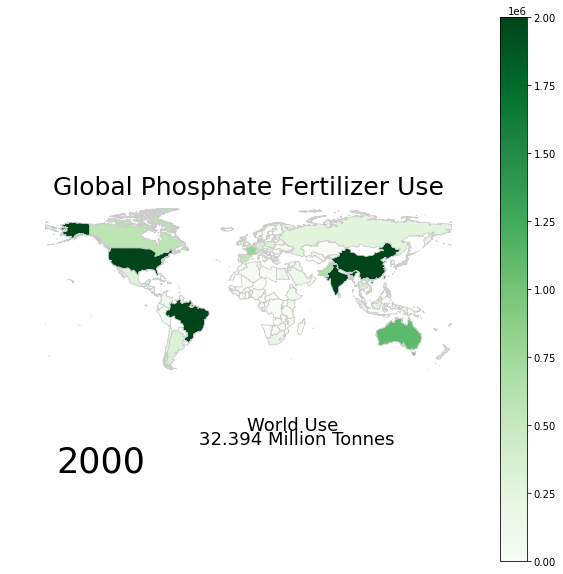

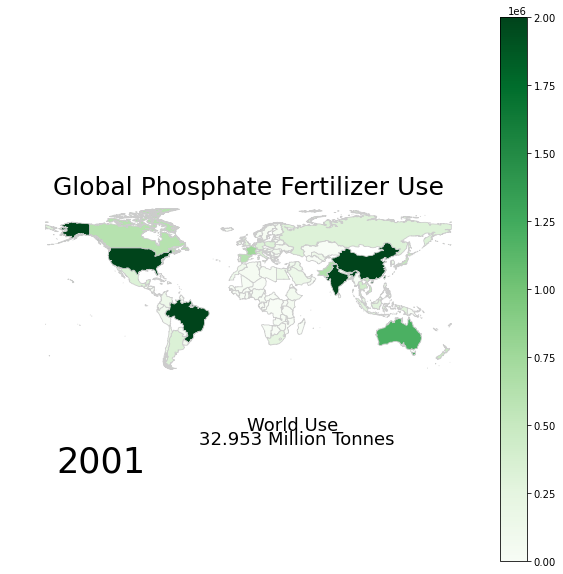

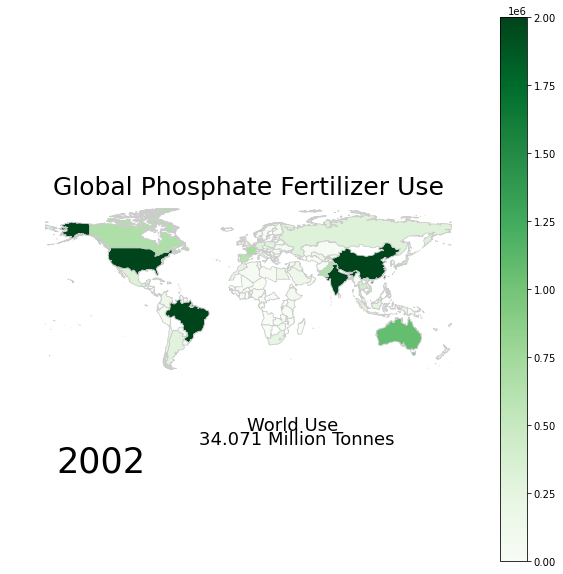

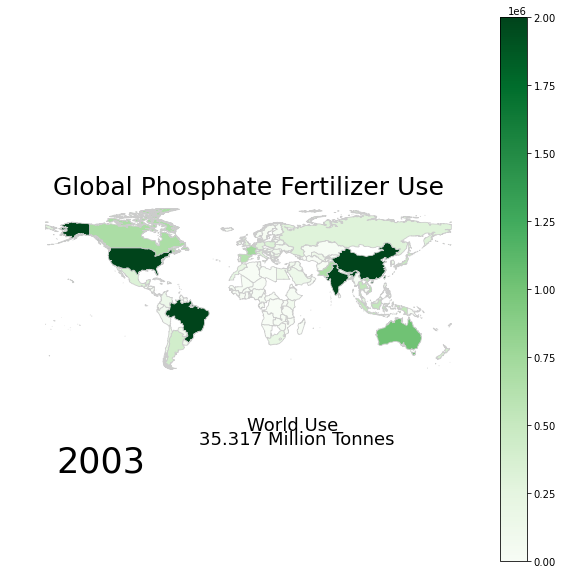

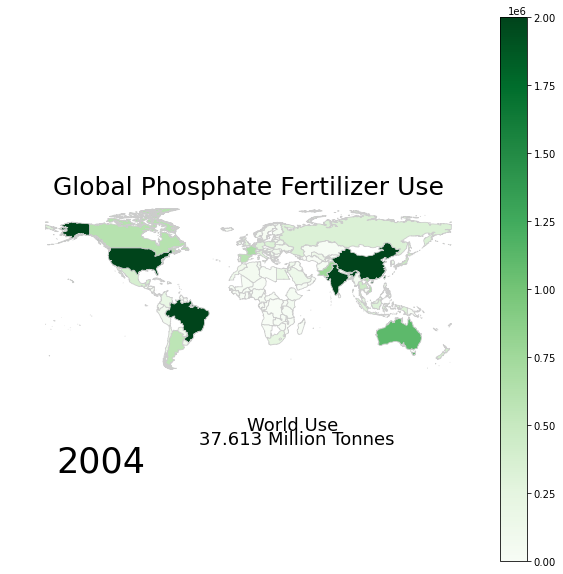

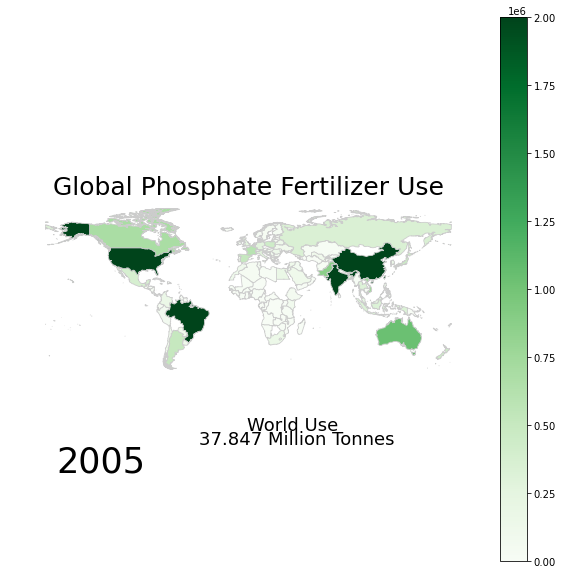

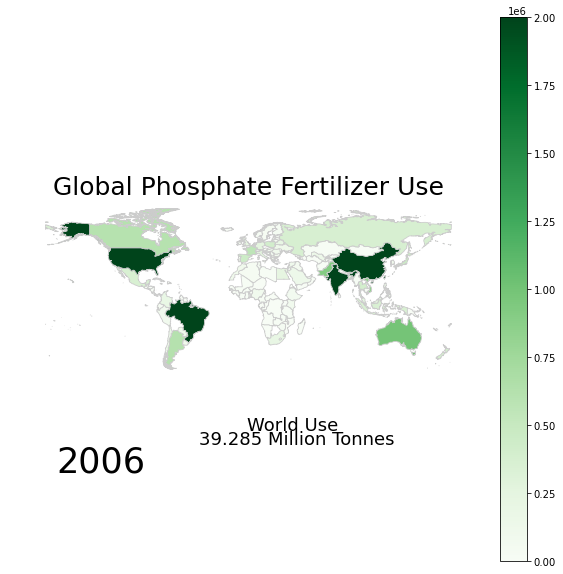

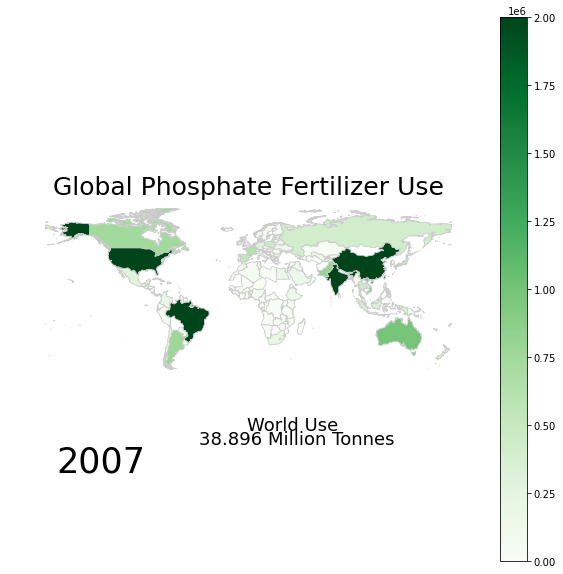

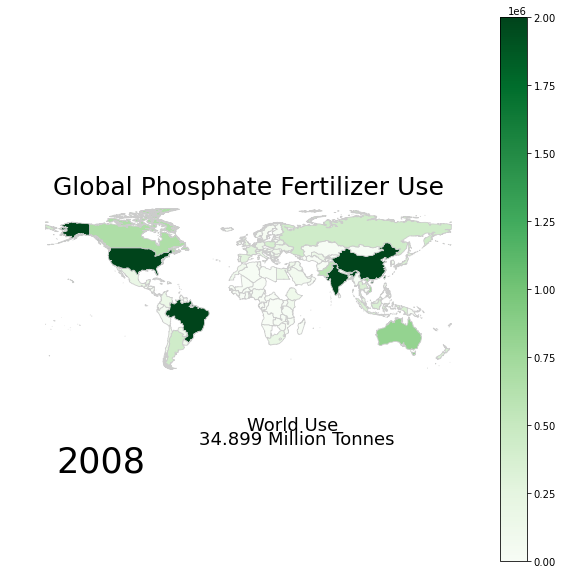

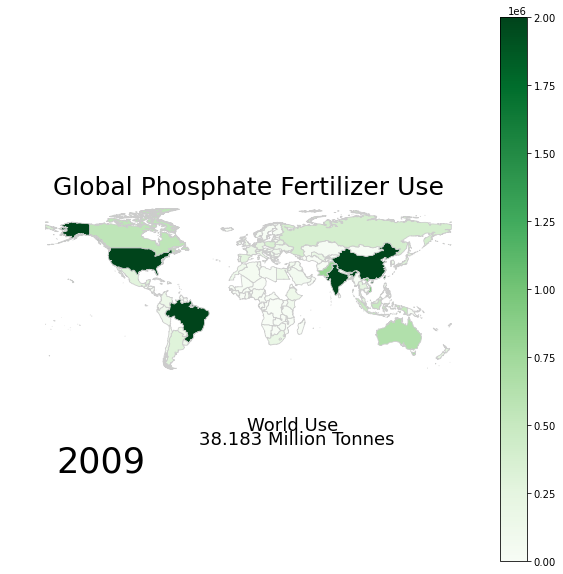

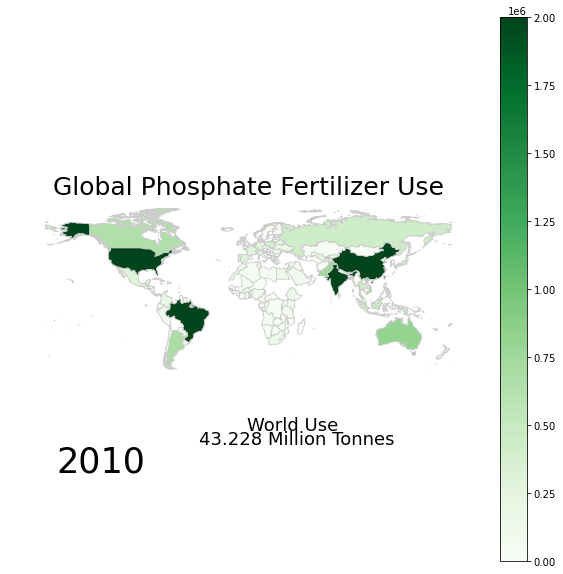

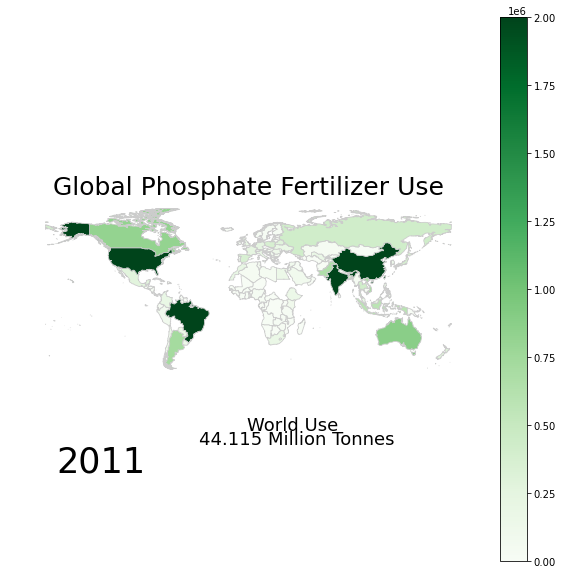

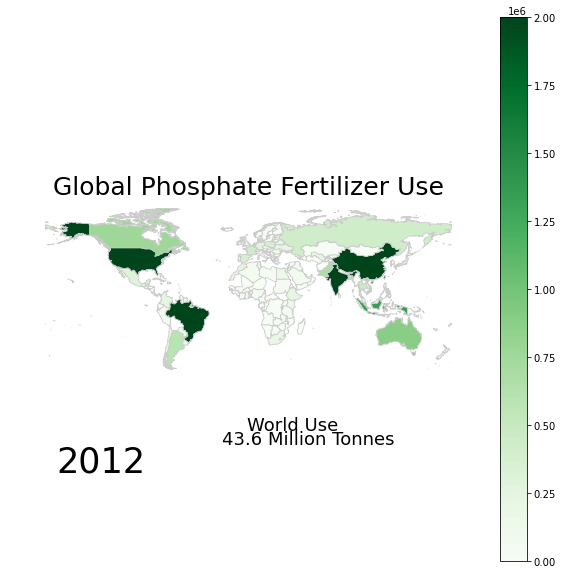

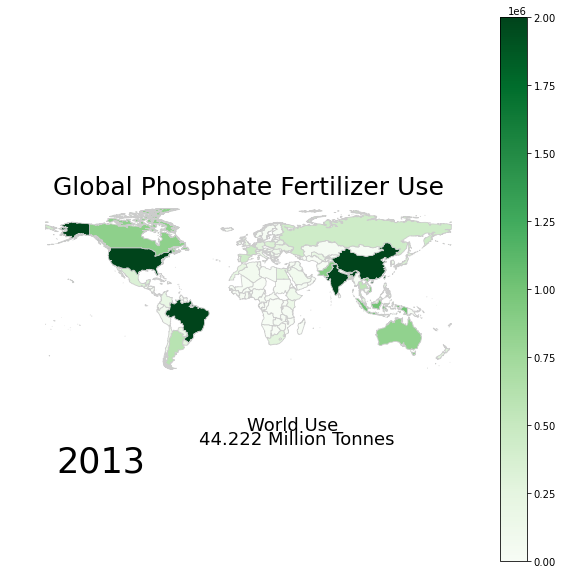

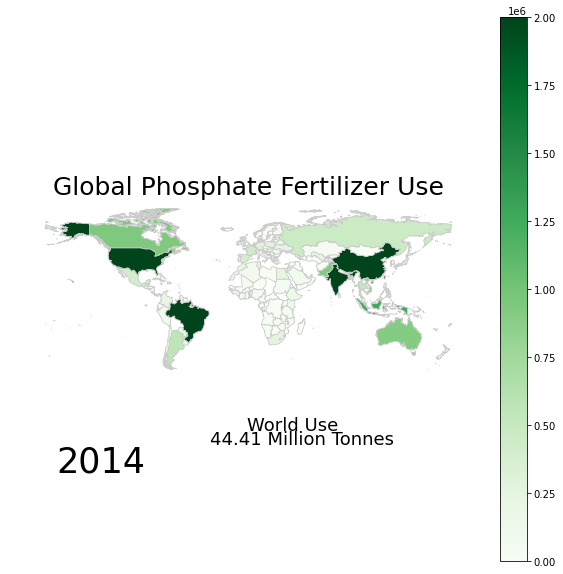

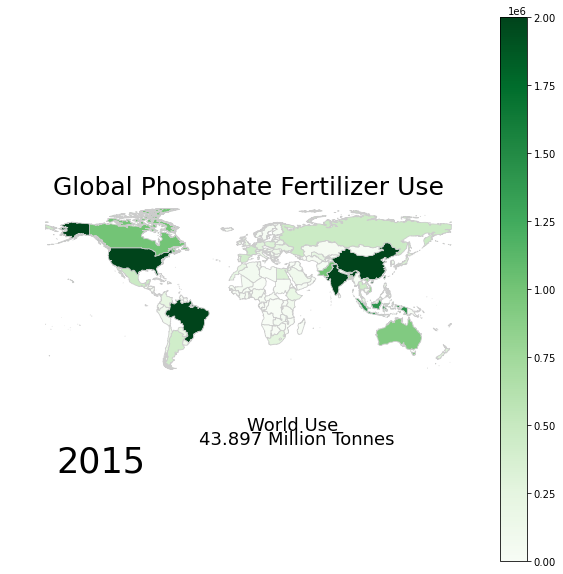

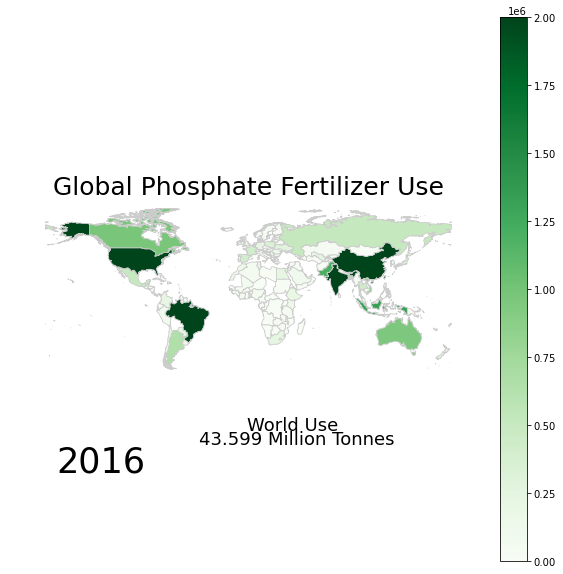

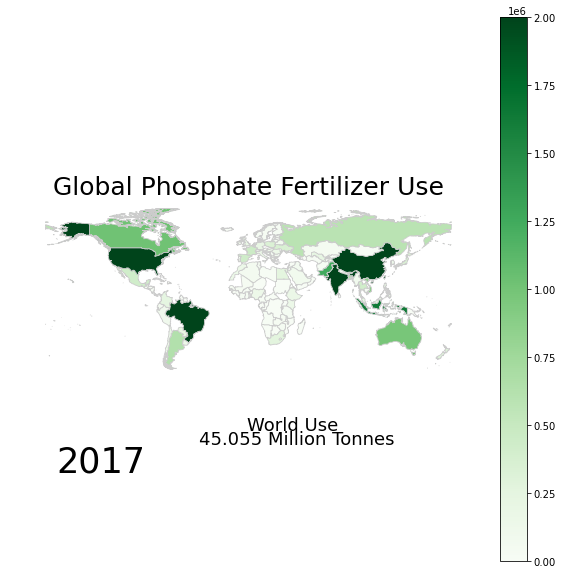

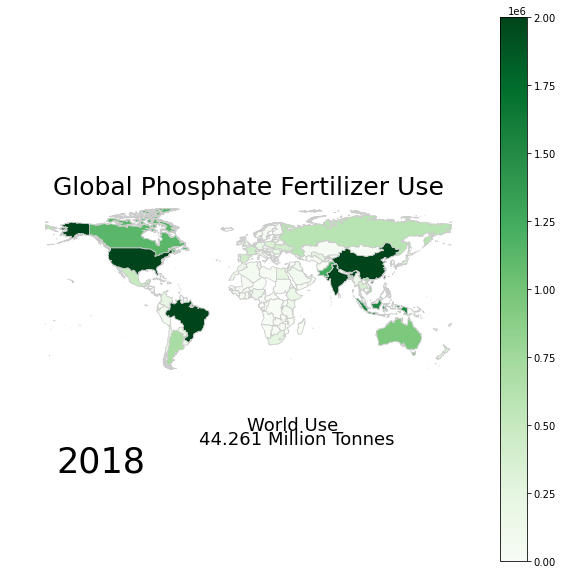

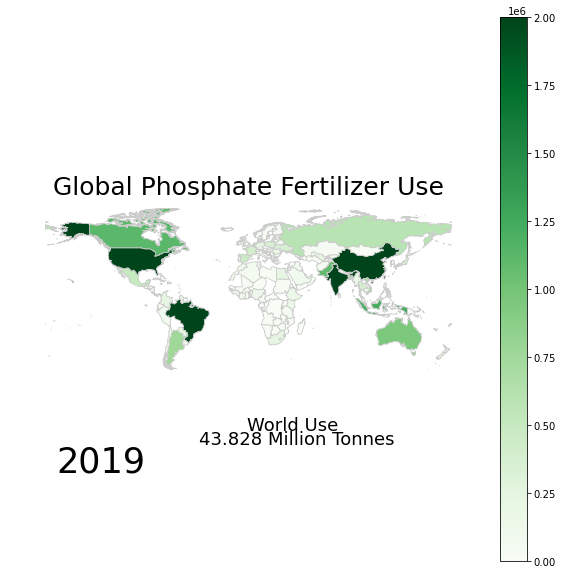

In [36]:
# Loop year year to create image for Phosphate fertilizer use
for year in year_range:
    df_new = merged.loc[((merged['Year'] == year) & (merged["Item Code"] == 3103) & (merged["Element Code"] == 5157))]
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_new.plot(column='Value', cmap='Greens', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
    legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # Remove axis
    fig.axis('off')
    
    # Get world fertilizer use value from world_data_df
    value = world_data_df.loc[world_data_df['Year'] == year, 'Mill_Tonnes_Text'].iloc[0]
    
    # Create a title
    fig.set_title('Global Phosphate Fertilizer Use', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # Position year in bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # Add total world use to graph
    fig.annotate('World Use', xy=(0.6, .275), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='top', 
                 fontsize=18)
    fig.annotate(value, xy=(0.7, .25), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='top', 
                 fontsize=18)
   
    # Save image as jpg for gif creation
    filepath = os.path.join(str(year) + '_P_fert.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [37]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + '_P_fert.jpg')
    im1.save(str(year) + '_P_fert.png')
    os.remove(str(year) + '_P_fert.jpg')

In [38]:
# Loop through png files and resize for better visualization
png_dir = os.getcwd()
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith("P_fert.png"):
        image = Image.open(file_name)
        new_width  = 800
        new_height = 800
        image = image.resize((new_width, new_height), Image.ANTIALIAS)
        image.save(file_name)

In [39]:
# Create Gif and remove each .png file
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith("P_fert.png"):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        os.remove(file_path)
imageio.mimsave("MapGif_Phos.gif", images, fps=1)
